<a href="https://colab.research.google.com/github/Sanjida05/image-55/blob/main/cls2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gamma Correction

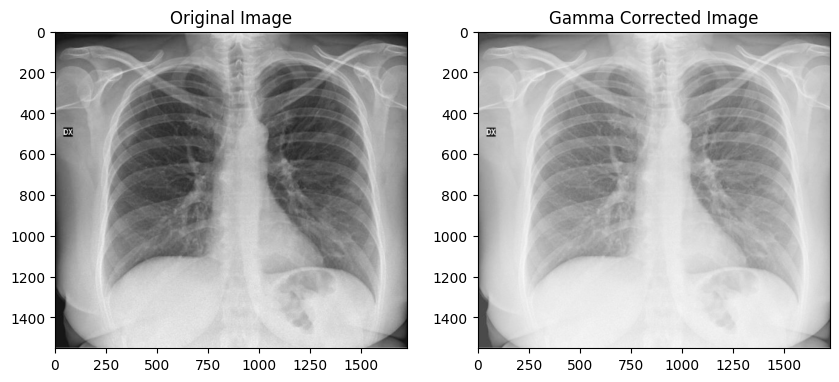

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Load image
image = cv2.imread('/content/drive/MyDrive/computer vision/image/x-ray.png')
gamma_corrected = gamma_correction(image, gamma=2.0)

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Gamma Corrected Image')
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.show()

Histogram-Based Methods

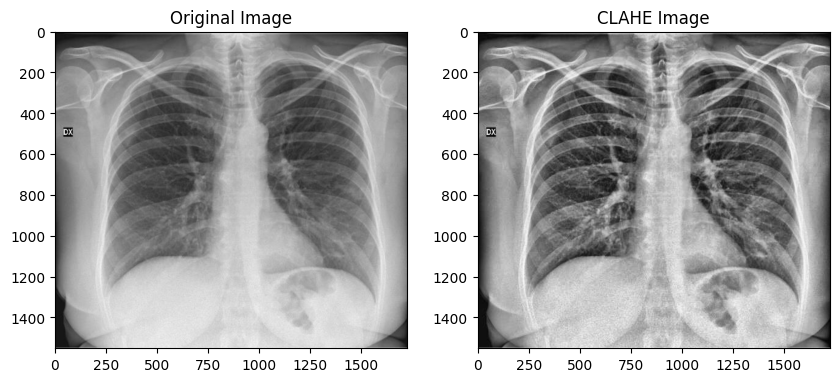

In [7]:
def clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(12, 12))
    if image is not None: # Check if image was loaded successfully
        if len(image.shape) == 2:
            return clahe.apply(image)
        elif len(image.shape) == 3:
            channels = cv2.split(image)
            clahe_channels = [clahe.apply(ch) for ch in channels]
            return cv2.merge(clahe_channels)
    else:
        return None # Handle the case where image is None

# Load image. Make sure 'image_path' is correct.
image_path = '/content/drive/MyDrive/computer vision/image/x-ray.png'
clahe_image = clahe(image)

# Display the result
if clahe_image is not None: # Check if CLAHE was applied successfully
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title('CLAHE Image')
    plt.imshow(clahe_image, cmap='gray')
    plt.show()
else:
    print("Failed to load or apply CLAHE to the image. Check the file path.")

Spatial Filtering

Averaging Filter

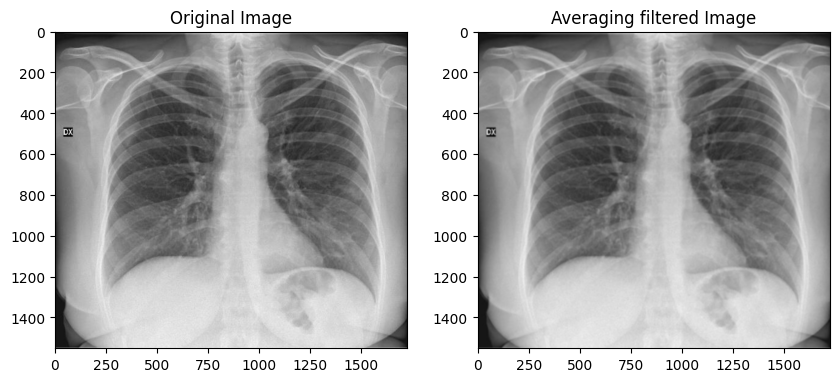

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image = cv.imread('/content/drive/MyDrive/computer vision/image/x-ray.png')

avg = cv.blur(image,(7,7))

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Averaging filtered Image')
plt.imshow(cv.cvtColor(avg, cv.COLOR_BGR2RGB))
plt.show()

Median Blur

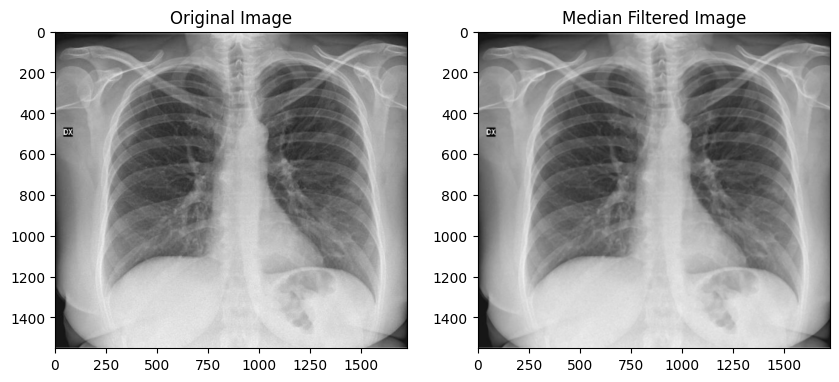

In [14]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv.imread('/content/drive/MyDrive/computer vision/image/x-ray.png')

# Apply a median filter with a kernel size of 7
median_filtered = cv.medianBlur(image, 7)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Median Filtered Image')
plt.imshow(cv.cvtColor(median_filtered, cv.COLOR_BGR2RGB))
plt.show()


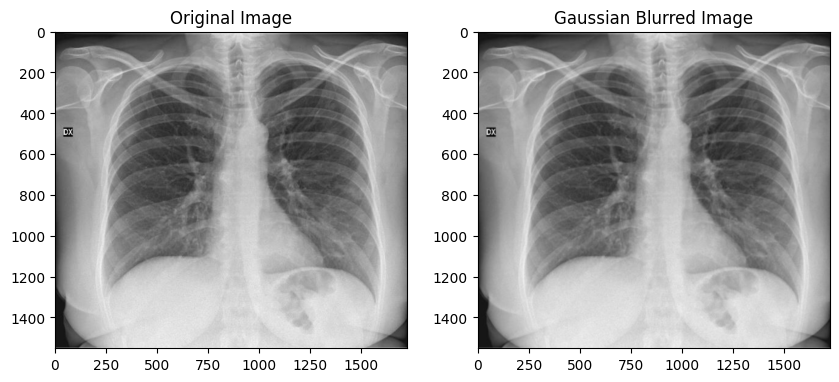

In [16]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv.imread('/content/drive/MyDrive/computer vision/image/x-ray.png')

# Apply Gaussian Blur Parameters: (image, kernel size, standard deviation)
gaussian_blurred = cv.GaussianBlur(image, (7, 7), 0)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Gaussian Blurred Image')
plt.imshow(cv.cvtColor(gaussian_blurred, cv.COLOR_BGR2RGB))
plt.show()


Frequency Domain Methods

Fournier Filtering

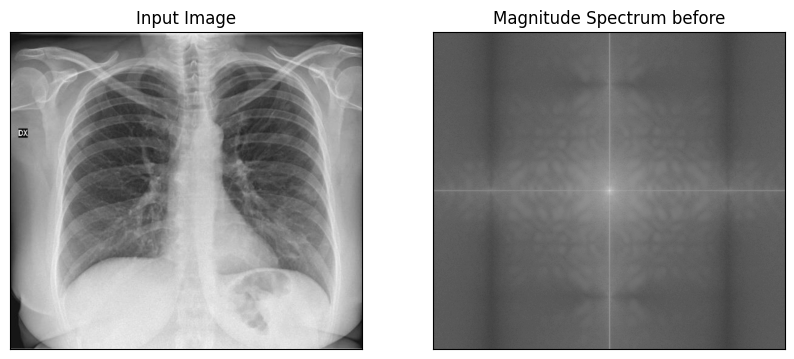

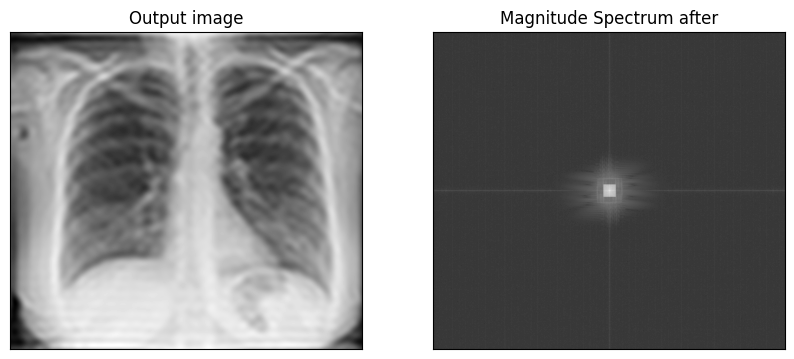

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('/content/drive/MyDrive/computer vision/image/x-ray.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum before'), plt.xticks([]), plt.yticks([])
plt.show()
rows, cols = img.shape
crow, ccol = rows//2, cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

# Plot the magnitude spectrum of the filtered image
dft_back = cv.dft(np.float32(img_back), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift_back = np.fft.fftshift(dft_back)
magnitude_spectrum_back = 20 * np.log(cv.magnitude(dft_shift_back[:,:,0], dft_shift_back[:,:,1]))

plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Output image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum_back, cmap = 'gray')
plt.title('Magnitude Spectrum after'), plt.xticks([]), plt.yticks([])
plt.show()